Salaries by metro and non-metro regions
- https://www.bls.gov/oes/tables.htm
- https://www.bls.gov/oes/current/oes311131.htm
- https://www.bls.gov/oes/current/oes_stru.htm

Occupation employment numbers and educational requirements
- https://www.careeronestop.org/Toolkit/Careers/careers-largest-employment.aspx

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
non_metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'non-metro-employee-salary.csv')

In [4]:
metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'metro-employee-salary.csv')

In [5]:
non_metro_salary_df[:3]

,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,tot_emp,emp_prse,jobs_1000,loc_quotient,pct_total,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,100001,Northwest Alabama nonmetropolitan area,6,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"65,640",2.6,1000.000,1.00,NaN,17.83,"37,090",1.4,8.78,10.78,15.06,21.11,29.39,"18,260","22,410","31,330","43,910","61,120",NaN,NaN
1,100001,Northwest Alabama nonmetropolitan area,6,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"1,770",4.6,26.982,0.49,NaN,44.12,"91,760",2.7,18.51,28.29,38.46,54.38,76.17,"38,490","58,850","79,990","113,100","158,420",NaN,NaN
2,100001,Northwest Alabama nonmetropolitan area,6,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,50,32.1,0.807,0.58,NaN,47.01,"97,780",22.7,8.16,9.09,53.55,64.43,98.69,"16,980","18,900","111,380","134,020","205,280",NaN,NaN


In [11]:
len(non_metro_salary_df), len(metro_salary_df)

(46384, 142410)

In [6]:
metro_salary_df[:20]

,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,tot_emp,emp_prse,jobs_1000,loc_quotient,pct_total,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"66,510",3.1,1000.000,1.00,NaN,20.08,"41,760",1.8,8.94,10.97,15.64,24.05,35.21,"18,580","22,810","32,530","50,030","73,230",NaN,NaN
1,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"2,670",5.8,40.137,0.73,NaN,43.51,"90,500",2.2,17.86,27.22,37.51,51.88,75.57,"37,140","56,610","78,030","107,910","157,190",NaN,NaN
2,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,"1,100",7.7,16.499,1.01,NaN,40.39,"84,000",3.7,10.97,24.21,35.51,51.38,74.29,"22,810","50,350","73,850","106,870","154,520",NaN,NaN
3,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,110,18.8,1.728,0.63,NaN,59.96,"124,710",6.6,22.77,34.69,57.65,74.55,99.80,"47,360","72,140","119,920","155,050","207,570",NaN,NaN
4,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-2030,Public Relations and Fundraising Managers,detailed,40,29.7,0.571,1.06,NaN,*,*,*,*,*,*,*,*,*,*,*,*,*,NaN,NaN
5,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-3010,Administrative Services and Facilities Managers,detailed,150,12.3,2.197,1.05,NaN,40.55,"84,350",6.7,25.17,28.25,34.53,43.93,57.93,"52,360","58,760","71,810","91,380","120,490",NaN,NaN
6,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-3021,Computer and Information Systems Managers,detailed,50,23.6,0.819,0.28,NaN,55.96,"116,390",8.4,27.05,36.01,50.17,69.41,93.63,"56,260","74,910","104,350","144,370","194,760",NaN,NaN
7,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-3031,Financial Managers,detailed,150,15.7,2.248,0.50,NaN,56.23,"116,970",8.7,26.66,33.53,44.45,60.43,#,"55,450","69,730","92,460","125,700",#,NaN,NaN
8,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-3051,Industrial Production Managers,detailed,40,27.7,0.603,0.48,NaN,47.42,"98,640",9.7,27.68,32.71,42.54,53.62,62.88,"57,580","68,030","88,490","111,530","130,800",NaN,NaN
9,10180,"Abilene, TX",4,0,Cross-industry,cross-industry,1235,11-3071,"Transportation, Storage, and Distribution Mana...",detailed,80,22.5,1.137,1.26,NaN,38.24,"79,540",3.8,27.59,33.36,37.67,44.34,49.55,"57,390","69,390","78,360","92,220","103,070",NaN,NaN


### Join metro and non-metro

In [12]:
metro_salary_df = pd.concat([metro_salary_df, non_metro_salary_df])

### get salary data as integers

In [15]:
def get_int(x):
    try:
        return int(strip_name(x))
    except:
        return np.nan

In [16]:
strip_name(metro_salary_df.a_median.values[0])

'32530'

In [17]:
metro_salary_df["mean_annual"] = [get_int(i) for i in metro_salary_df.a_mean.values]
metro_salary_df["median_annual"] = [get_int(i) for i in metro_salary_df.a_median.values]
metro_salary_df["tot_emp"] = [get_int(i) for i in metro_salary_df.tot_emp.values]

### Get median salary across occupations

In [18]:
metro_area_median = metro_salary_df[metro_salary_df.occ_title == "All Occupations"][
    ["area", "area_title", "median_annual", "mean_annual"]
]

### Scale with the cost of living

In [21]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison-2020.csv', skiprows=4)
cost_of_living_df['RPP'] = cost_of_living_df['2020']
cost_of_living_df = cost_of_living_df[cost_of_living_df.Description == 'RPPs: All items']

In [22]:
cost_of_living_df["GeoFips"] = cost_of_living_df.GeoFips.values.astype(int)

In [99]:
cost_of_living_df[:3]

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,RPP
0,0,United States,1.0,RPPs: All items,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,999,United States (Nonmetropolitan Portion) 1/,1.0,RPPs: All items,86.6,86.8,87.3,87.5,87.8,88.2,88.1,88.0,87.9,87.9,87.3,86.8,86.8
8,10180,"Abilene, TX (Metropolitan Statistical Area)",1.0,RPPs: All items,90.4,89.8,90.4,90.8,91.4,90.9,91.2,90.9,90.8,89.8,90.7,90.3,90.3


In [100]:
metro_area_median = metro_area_median.merge(cost_of_living_df[["RPP", "GeoFips"]], left_on = "area", right_on = "GeoFips")

In [101]:
metro_area_median['mean_scaled'] = metro_area_median.mean_annual/(metro_area_median.RPP/100)

In [102]:
metro_area_median['median_scaled'] = metro_area_median.median_annual/(metro_area_median.RPP/100)

In [103]:
metro_area_median.sort_values(by='median_scaled', ascending=False)[:30]

,area,area_title,median_annual,mean_annual,RPP,GeoFips,mean_scaled,median_scaled
47,15680,"California-Lexington Park, MD",63040.0,72070.0,96.4,15680,74761.410788,65394.190871
331,45940,"Trenton, NJ",52970.0,65160.0,106.2,45940,61355.932203,49877.589454
96,20500,"Durham-Chapel Hill, NC",46760.0,61220.0,94.8,20500,64578.059072,49324.894515
296,41940,"San Jose-Sunnyvale-Santa Clara, CA",61980.0,83960.0,126.7,41940,66266.771902,48918.705604
40,14500,"Boulder, CO",51520.0,67160.0,106.7,14500,62942.830366,48284.910965
348,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",56320.0,72600.0,117.4,47900,61839.863714,47972.742760
277,40340,"Rochester, MN",44490.0,59710.0,92.9,40340,64273.412271,47890.204521
34,13900,"Bismarck, ND",42990.0,51440.0,91.9,13900,55973.884657,46779.107726
304,42660,"Seattle-Tacoma-Bellevue, WA",53360.0,68460.0,114.5,42660,59790.393013,46602.620087
83,19180,"Danville, IL",36570.0,44220.0,79.1,19180,55903.919090,46232.616941


In [104]:
metro_area_median.to_pickle(DATA_DIR/ 'median_salary_by_area.pickle')

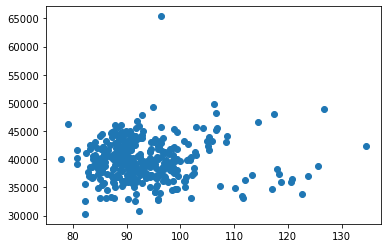

In [90]:
plt.scatter(metro_area_median.RPP, metro_area_median.median_scaled)

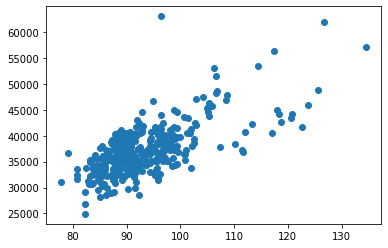

In [93]:
plt.scatter(metro_area_median.RPP, metro_area_median.median_annual)

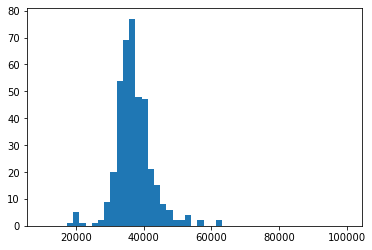

In [69]:
plt.hist(metro_area_median.median_annual.values, bins = np.linspace(10000, 100000, 50));